In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics

In [172]:
compute_6000_run = pd.read_csv(
    f"compute_dummy_RTX6000Ada_gpu_1024*M*1024.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", "utilization", 'flops']
)
compute_6000_run.set_index(["M"], inplace=True)

matmul_6000_sim = pd.read_csv(
    f"matmul_RTX6000Ada_sim_compute_dummy_offse.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "total", "memory_to_l2_transfer", "l2_to_l1_transfer", "l1_to_l0_transfer", "compute"]
)
matmul_6000_sim.set_index(["K"], inplace=True)

compute_4090_run = pd.read_csv(
    f"compute_dummy_RTX4090_gpu_1024*M*1024.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", "utilization", 'flops']
)
compute_4090_run.set_index(["M"], inplace=True)

matmul_4090_sim = pd.read_csv(
    f"matmul_RTX4090_sim_compute_dummy_offset.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "total", "memory_to_l2_transfer", "l2_to_l1_transfer", "l1_to_l0_transfer", "compute"]
)
matmul_4090_sim.set_index(["K"], inplace=True)

compute_L4_run = pd.read_csv(
    f"compute_dummy_L4_gpu_1024*M*1024.csv", header=None, names=["M", "latency", "throughput", "power", "energy", "frequency", "utilization", 'flops']
)
compute_L4_run.set_index(["M"], inplace=True)

matmul_L4_sim = pd.read_csv(
    f"matmul_L4_sim_compute_dummy_offset.csv", header=None, names=["M", "N", "K", "latency", "throughput", "power", "total", "memory_to_l2_transfer", "l2_to_l1_transfer", "l1_to_l0_transfer", "compute"]
)
matmul_L4_sim.set_index(["K"], inplace=True)

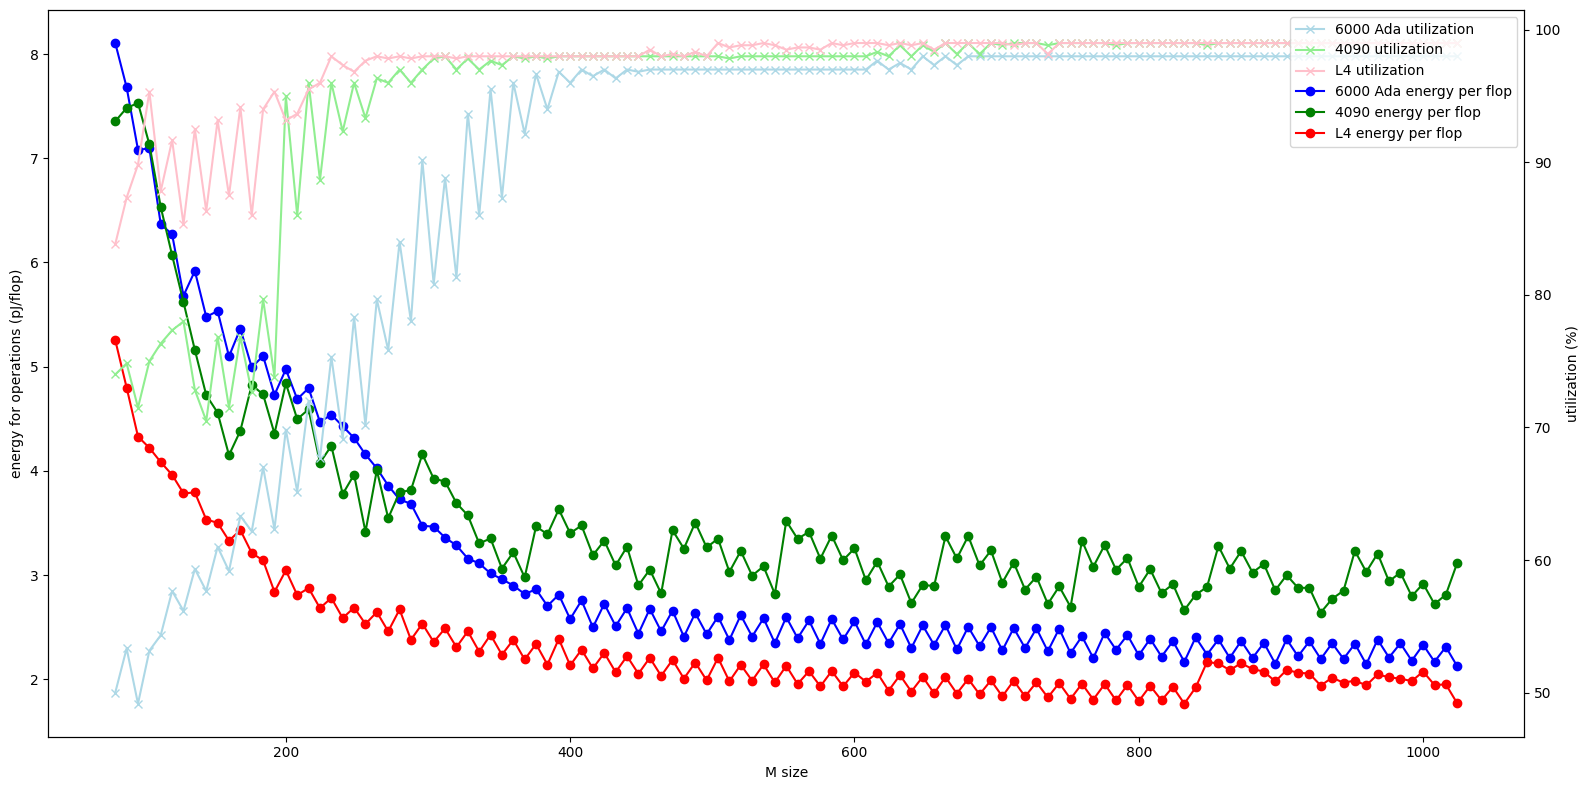

In [173]:
M_list = []
energy_6000_run_list = []
energy_6000_per_flop_list = []
utilization_6000_list = []
energy_4090_run_list = []
energy_4090_per_flop_list = []
utilization_4090_list = []
energy_L4_run_list = []
energy_L4_per_flop_list = []
utilization_L4_list = []
for M in range(80, 1024 + 1, 8):
    M_list.append(M)
    energy_6000_run_list.append(compute_6000_run.loc[M, "energy"])
    energy_6000_per_flop_list.append(
        (compute_6000_run.loc[M, "energy"]) / compute_6000_run.loc[M, "flops"])
    utilization_6000_list.append(compute_6000_run.loc[M, "utilization"])
    energy_4090_run_list.append(compute_4090_run.loc[M, "energy"])
    energy_4090_per_flop_list.append(
        (compute_4090_run.loc[M, "energy"]) / compute_4090_run.loc[M, "flops"])
    utilization_4090_list.append(compute_4090_run.loc[M, "utilization"])
    energy_L4_run_list.append(compute_L4_run.loc[M, "energy"])
    energy_L4_per_flop_list.append(
        (compute_L4_run.loc[M, "energy"]) / compute_L4_run.loc[M, "flops"])
    utilization_L4_list.append(compute_L4_run.loc[M, "utilization"])
    
    
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlabel("M size")
ax1.plot(M_list, energy_6000_per_flop_list, marker="o", label=f"6000 Ada energy per flop", color='blue')
ax1.plot(M_list, energy_4090_per_flop_list, marker="o", label=f"4090 energy per flop", color='green')
ax1.plot(M_list, energy_L4_per_flop_list, marker="o", label=f"L4 energy per flop", color='red')
ax1.set_ylabel('energy for operations (pJ/flop)')

ax2 = ax1.twinx()
ax2.plot(M_list, utilization_6000_list, marker="x", label=f"6000 Ada utilization", color='lightblue')
ax2.plot(M_list, utilization_4090_list, marker="x", label=f"4090 utilization", color='lightgreen')
ax2.plot(M_list, utilization_L4_list, marker="x", label=f"L4 utilization", color='pink')
ax2.set_ylabel('utilization (%)')

ax2.plot([], [], marker="o", label=f"6000 Ada energy per flop", color='blue')
ax2.plot([], [], marker="o", label=f"4090 energy per flop", color='green')
ax2.plot([], [], marker="o", label=f"L4 energy per flop", color='red')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

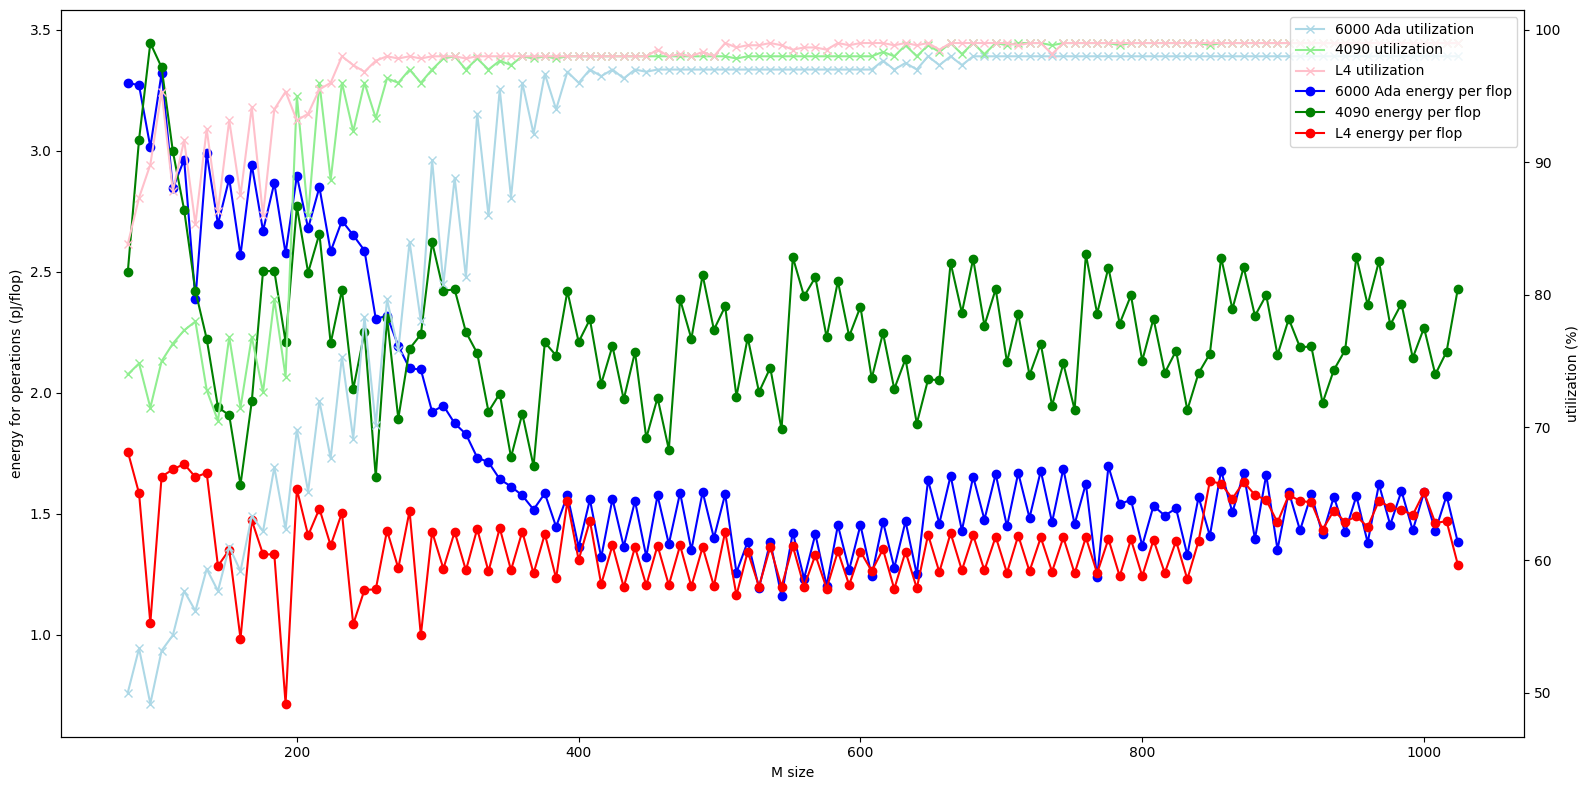

In [174]:
M_list = []
energy_6000_run_list = []
energy_6000_per_flop_list = []
utilization_6000_list = []
energy_4090_run_list = []
energy_4090_per_flop_list = []
utilization_4090_list = []
energy_L4_run_list = []
energy_L4_per_flop_list = []
utilization_L4_list = []
for M in range(80, 1024 + 1, 8):
    M_list.append(M)
    energy_6000_run_list.append(compute_6000_run.loc[M, "energy"])
    energy_6000_per_flop_list.append((
        compute_6000_run.loc[M, "energy"] - (
            matmul_6000_sim.loc[M, "memory_to_l2_transfer"] / 15 * 15.074502882787087 + 
            matmul_6000_sim.loc[M, "l2_to_l1_transfer"] / 5 * 4.40761797015162
        ) * 50/2 - 29739234437.872406) / compute_6000_run.loc[M, "flops"])
    utilization_6000_list.append(compute_6000_run.loc[M, "utilization"])
    energy_4090_run_list.append(compute_4090_run.loc[M, "energy"])
    energy_4090_per_flop_list.append((
        compute_4090_run.loc[M, "energy"] - (
            matmul_4090_sim.loc[M, "memory_to_l2_transfer"] / 11 * 11.232087528894693 +
            matmul_4090_sim.loc[M, "l2_to_l1_transfer"] / 5 * 4.522193249816379
        ) * 50/2 - 30356387578.69525) / compute_4090_run.loc[M, "flops"])
    utilization_4090_list.append(compute_4090_run.loc[M, "utilization"])
    energy_L4_run_list.append(compute_L4_run.loc[M, "energy"])
    energy_L4_per_flop_list.append((
        compute_L4_run.loc[M, "energy"] - (
            matmul_L4_sim.loc[M, "memory_to_l2_transfer"] / 14 * 14.155341397672922 + 
            matmul_L4_sim.loc[M, "l2_to_l1_transfer"] / 3.5 * 3.20315807756962
            ) * 50/2 - 17904898018.631546) / compute_L4_run.loc[M, "flops"])
    utilization_L4_list.append(compute_L4_run.loc[M, "utilization"])
    
    
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlabel("M size")
ax1.plot(M_list, energy_6000_per_flop_list, marker="o", label=f"6000 Ada energy per flop", color='blue')
ax1.plot(M_list, energy_4090_per_flop_list, marker="o", label=f"4090 energy per flop", color='green')
ax1.plot(M_list, energy_L4_per_flop_list, marker="o", label=f"L4 energy per flop", color='red')
ax1.set_ylabel('energy for operations (pJ/flop)')

ax2 = ax1.twinx()
ax2.plot(M_list, utilization_6000_list, marker="x", label=f"6000 Ada utilization", color='lightblue')
ax2.plot(M_list, utilization_4090_list, marker="x", label=f"4090 utilization", color='lightgreen')
ax2.plot(M_list, utilization_L4_list, marker="x", label=f"L4 utilization", color='pink')
ax2.set_ylabel('utilization (%)')

ax2.plot([], [], marker="o", label=f"6000 Ada energy per flop", color='blue')
ax2.plot([], [], marker="o", label=f"4090 energy per flop", color='green')
ax2.plot([], [], marker="o", label=f"L4 energy per flop", color='red')

plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

In [175]:
print(f"RTX6000Ada per flop energy: {statistics.mean(energy_6000_per_flop_list[int(400/8):int(1024/8)])}")
print(f"RTX4090 per flop energy {statistics.mean(energy_4090_per_flop_list[int(250/8):int(1024/8)])}")
print(f"L4 per flop energy {statistics.mean(energy_L4_per_flop_list[int(224/8):int(1024/8)])}")

RTX6000Ada per flop energy: 1.470307229993248
RTX4090 per flop energy 2.203423708005748
L4 per flop energy 1.365728068870071


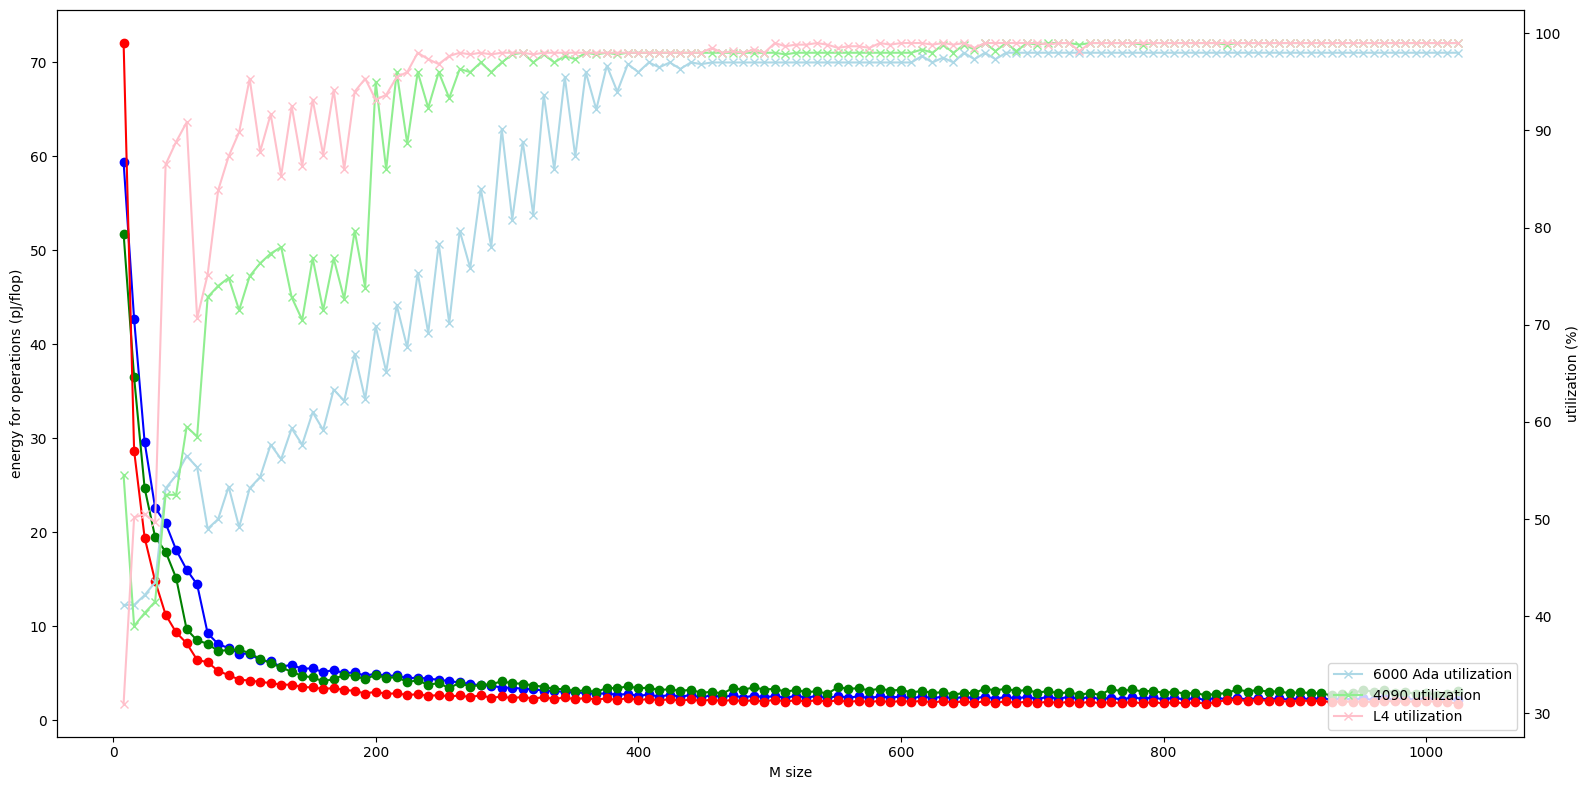

In [176]:
M_list = []
energy_6000_run_list = []
energy_6000_per_flop_list = []
utilization_6000_list = []
energy_4090_run_list = []
energy_4090_per_flop_list = []
utilization_4090_list = []
energy_L4_run_list = []
energy_L4_per_flop_list = []
utilization_L4_list = []
for M in range(8, 1024 + 1, 8):
    M_list.append(M)
    energy_6000_run_list.append(compute_6000_run.loc[M, "energy"])
    energy_6000_per_flop_list.append((compute_6000_run.loc[M, "energy"]) / compute_6000_run.loc[M, "flops"])
    utilization_6000_list.append(compute_6000_run.loc[M, "utilization"])
    energy_4090_run_list.append(compute_4090_run.loc[M, "energy"])
    energy_4090_per_flop_list.append(compute_4090_run.loc[M, "energy"] / compute_4090_run.loc[M, "flops"])
    utilization_4090_list.append(compute_4090_run.loc[M, "utilization"])
    energy_L4_run_list.append(compute_L4_run.loc[M, "energy"])
    energy_L4_per_flop_list.append(compute_L4_run.loc[M, "energy"] / compute_L4_run.loc[M, "flops"])
    utilization_L4_list.append(compute_L4_run.loc[M, "utilization"])
    
    
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlabel("M size")
ax1.plot(M_list, energy_6000_per_flop_list, marker="o", label=f"6000 Ada energy per flop", color='blue')
ax1.plot(M_list, energy_4090_per_flop_list, marker="o", label=f"4090 energy per flop", color='green')
ax1.plot(M_list, energy_L4_per_flop_list, marker="o", label=f"L4 energy per flop", color='red')
ax1.set_ylabel('energy for operations (pJ/flop)')

ax2 = ax1.twinx()
ax2.plot(M_list, utilization_6000_list, marker="x", label=f"6000 Ada utilization", color='lightblue')
ax2.plot(M_list, utilization_4090_list, marker="x", label=f"4090 utilization", color='lightgreen')
ax2.plot(M_list, utilization_L4_list, marker="x", label=f"L4 utilization", color='pink')
ax2.set_ylabel('utilization (%)')

plt.legend()
plt.tight_layout()
plt.show()

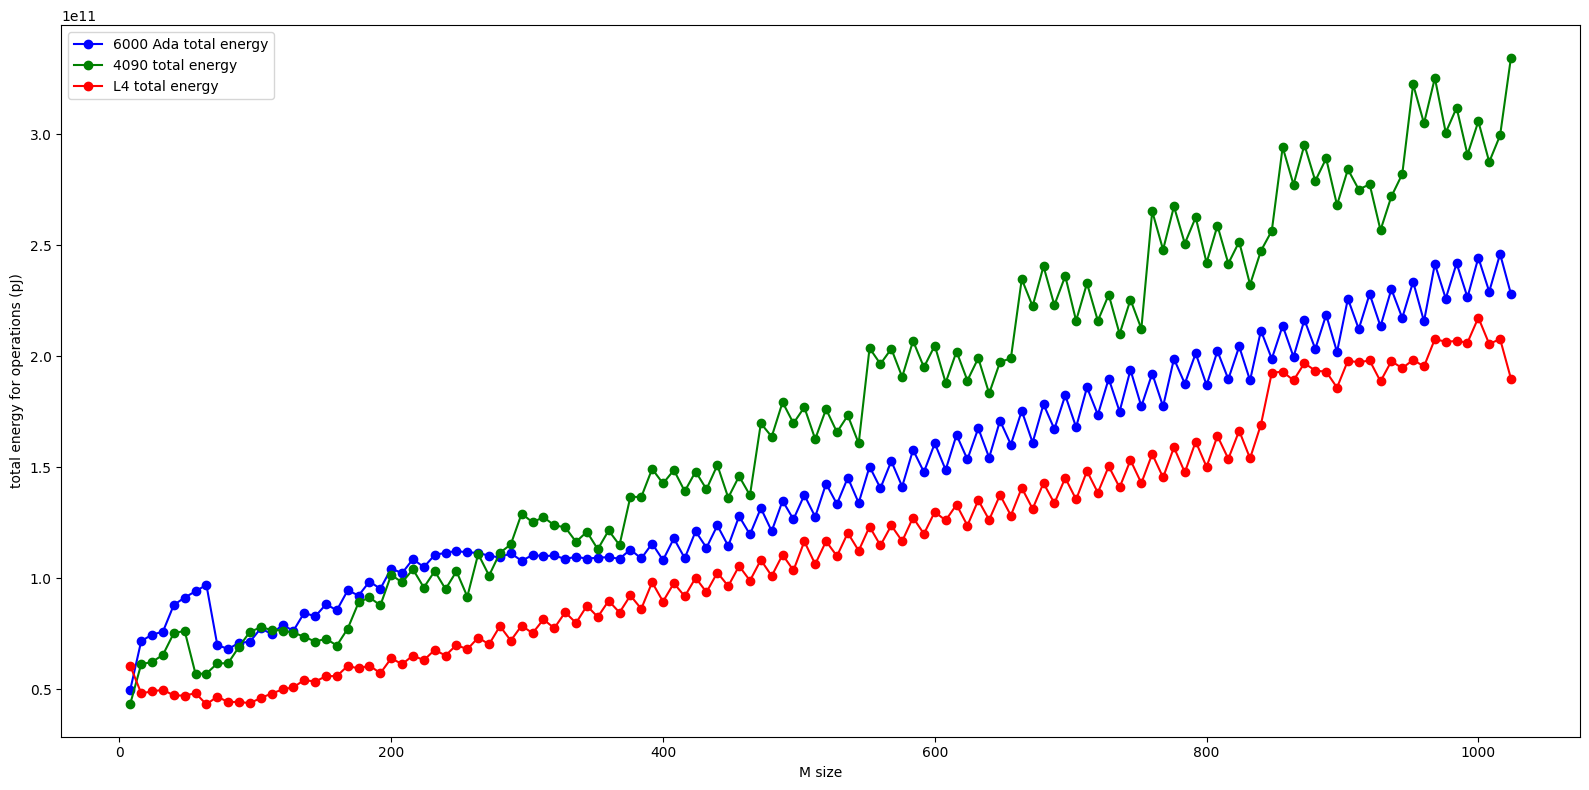

In [177]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.set_xlabel("M size")
ax1.plot(M_list, energy_6000_run_list, marker="o", label=f"6000 Ada total energy", color='blue')
ax1.plot(M_list, energy_4090_run_list, marker="o", label=f"4090 total energy", color='green')
ax1.plot(M_list, energy_L4_run_list, marker="o", label=f"L4 total energy", color='red')
ax1.set_ylabel('total energy for operations (pJ)')
plt.legend()
plt.tight_layout()
plt.show()

In [178]:
def get_offset(y_data, x_data):
    x_mean = np.mean(x_data)
    y_mean = np.mean(y_data)
    m = np.sum((x_data - x_mean) * (y_data - y_mean)) / np.sum((x_data - x_mean) ** 2)
    b = y_mean - m * x_mean
    return float(m), float(b)

In [179]:
print(f"RTX6000Ada offset: {get_offset(energy_6000_run_list[50:], M_list[50:])}")
print(f"RTX4090 offset: {get_offset(energy_4090_run_list[32:], M_list[32:])}")
print(f"L4 offset: {get_offset(energy_L4_run_list[28:], M_list[28:])}")

RTX6000Ada offset: (206210237.96947065, 29739234437.872406)
RTX4090 offset: (276066624.4272076, 30356387578.69525)
L4 offset: (184852580.03528342, 17904898018.631546)


In [180]:
y_data = np.array(energy_6000_run_list[50:])
x_data = np.array(M_list[50:])

x_mean = np.mean(x_data)
y_mean = np.mean(y_data)
m = np.sum((x_data - x_mean) * (y_data - y_mean)) / np.sum((x_data - x_mean) ** 2)
b = y_mean - m * x_mean
print(f"6000 Ada energy = {m} * M + {b}")

6000 Ada energy = 206210237.96947065 * M + 29739234437.872406


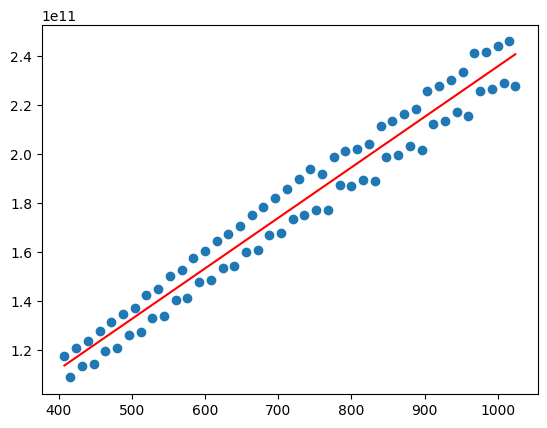

In [181]:
x = np.linspace(min(x_data), max(x_data), 1000)
y = m * x + b
plt.scatter(x_data, y_data)
plt.plot(x, y, color='red')
plt.show()